# <b> SYRIATEL CHURN ANALYSIS </b>

#### Author : Stella Kitur
--- 
### <b> Project Overview </b>
In this project I have utilised machine learning algorithms in order to identify any trends that can help in predicting whether a customer that is using SyriaTel will stop (churn) using the services. This is to help SyriaTel in their decision making process as well as in developing methods that might help to reduce the churn rate further.

## <b> Business Understanding </b>
### <b> Business Problem </b>
- Who is SyriaTel?
- Customer retention rate is key in the telecommunication domain 
- Important to know what features are leading to churn rate increase 
- What are the potential factors for churn?

#### <b>Objectives</b>
As the data scientist assigned to this project, what are your objectives?
1. Identify if there are certain features that can predict whether a customer will churn or not
2. Predict as accurately as possible using a model, whether a customer will churn



#### <b> Metrics of Success </b>
In this model, the metrics of success are outlined as follows :


## <b> Data Understanding </b>
In conducting this analysis, the CRISP-DM data science process was used.
There were : Outline important notes based on the dataset... etc. etc.

## <b> Import Libraries </b>

To start off this analysis, we will import the libraries that will be used in this notebook.

As well as including the necessary formatting for the data visualisations used throughout the notebook.

For convenience, the libraries have been categorised based on the function. 

In [1]:
# Import Libraries 

# imports
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
custom_color = custom_colors = ["#BE5A83", "#F2B6A0", "#FEF2F4"] #This is the color pallette for the notebook

#Stats


#Scikit imports
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load the data
# Display the shape of the data

df = pd.read_csv('data.csv')
print(df.shape)

(3333, 21)


## <b> Data Understanding </b>
Under this section, we will gain understanding of the dataset while also identifying if there are any missing/duplicated values before proceeding to conduct EDA (Exploratory Data Analysis) on the data to help us identify any key observations in the dataset. 

In [3]:
# Display the first 5 rows of the dataset
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
# Display the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### <b> Data Cleaning </b>

In [5]:
# Check for missing values and duplicated values 
print(df.isnull().sum())
print(f"There are {df.duplicated().sum()} duplicated values.")


state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64
There are 0 duplicated values.


In [6]:
# We will change the datatype of area code from an int to an object

df['area code'] = df['area code'].astype(object)
df['area code'].dtype # Check if the change has been made


dtype('O')

In [7]:
# Explore the values in the state column

print(df.state.value_counts())
print(f"There are {df['state'].nunique()} values, this is because SyriaTel is based in the USA and there are {df['state'].nunique()} states")


WV    106
MN     84
NY     83
AL     80
OR     78
OH     78
WI     78
WY     77
VA     77
CT     74
MI     73
VT     73
ID     73
UT     72
TX     72
IN     71
MD     70
KS     70
MT     68
NJ     68
NC     68
CO     66
WA     66
NV     66
MA     65
RI     65
MS     65
AZ     64
FL     63
MO     63
ME     62
ND     62
NM     62
NE     61
DE     61
OK     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64
There are 51 values, this is because SyriaTel is based in the USA and there are 51 states


#### <b> Label Encoding and One-Hot Encoding </b>

In [8]:
# Label Encoding the State column
# Label Encoding is preferred in this case as there are 51 unique values and will replace it with a unique integer.

Label_Encoder = LabelEncoder()
df['state'] = Label_Encoder.fit_transform(df['state'])
df['state']

0       16
1       35
2       31
3       35
4       36
        ..
3328     3
3329    49
3330    39
3331     6
3332    42
Name: state, Length: 3333, dtype: int64

##### <b> Feature Engineering </b>

In [9]:
# Feature Engineering -- Total Expenditure 
# This will calculate the total expenditure for each customer


df['total expenditure'] = df['total day charge'] \
                        + df['total eve charge'] \
                        + df['total night charge'] \
                        + df['total intl charge']

df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total expenditure
0,16,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,75.56
1,35,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,59.24
2,31,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,62.29
3,35,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,66.80
4,36,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,52.09


### <b> Exploratory Data Analysis </b>

##### <b> Summary Statistics </b>

In [10]:
# Descriptive Summary Statistics 

df.describe()

,state,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,total expenditure
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,26.059406,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,59.449754
std,14.824911,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,10.502261
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,22.930000
25%,14.000000,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,52.380000
50%,26.000000,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,59.470000
75%,39.000000,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,66.480000
max,50.000000,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,96.150000


##### <b> Distribution of Features</b>

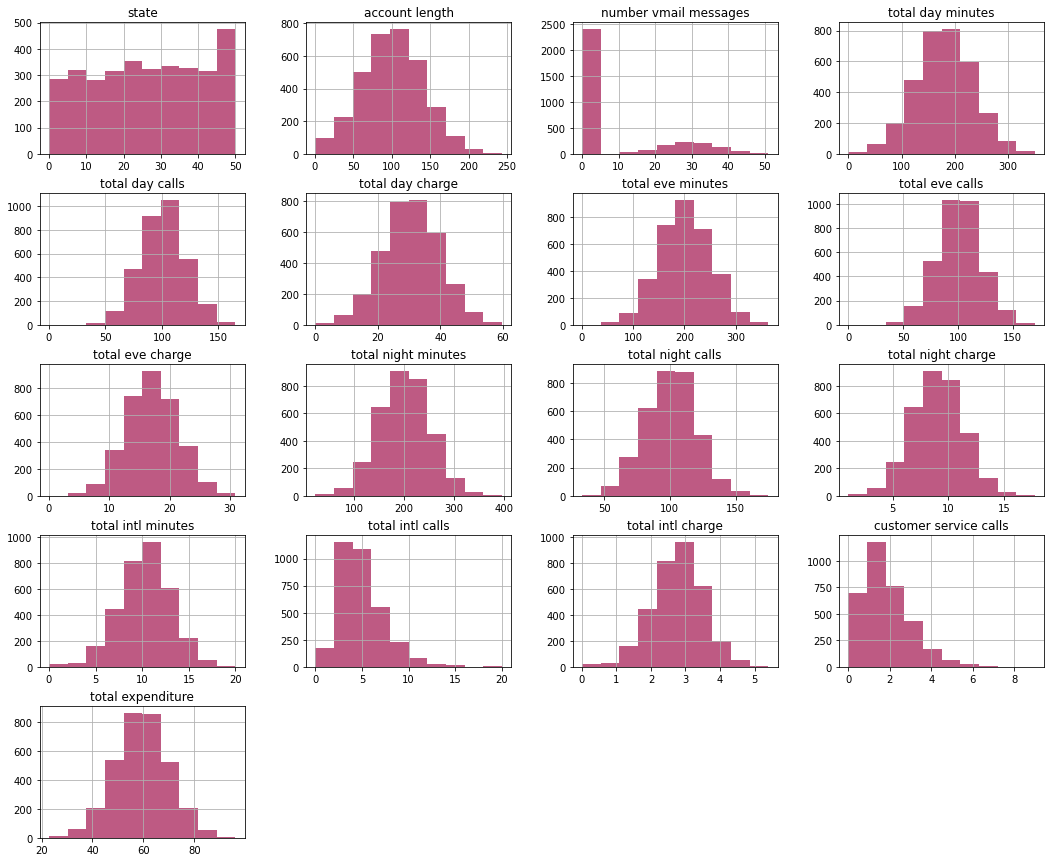

In [11]:
# The Distribution of Features

df.drop(columns='churn').hist(figsize=(18, 15), color="#BE5A83");


We notice based on this output that the features have different scalings, and we especially take note that not all of them are <b> normally distributed </b>

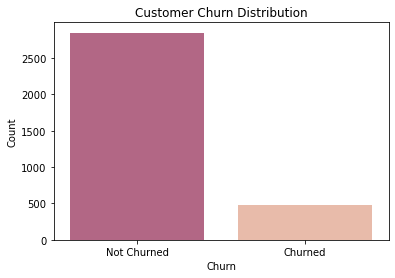

In [12]:
# Display the count of churned and non-churned counts in a bar chart 

churn_counts = df["churn"].value_counts()

# Plot the bar chart
sns.countplot(x="churn", data=df, palette=custom_colors)
plt.xlabel("Churn")
plt.ylabel("Count")
plt.title("Customer Churn Distribution")
plt.xticks([0,1], ["Not Churned", "Churned"])
plt.show()

In [13]:
# This function will be used to find the percentage value in different columns
def calculate_percentage(column):
    percentages = column.value_counts(normalize=True) * 100
    return percentages

In [14]:
churn_percentages = calculate_percentage(df["churn"])
print(churn_percentages)

False    85.508551
True     14.491449
Name: churn, dtype: float64


We can take note that majority of the customers 85.5% had not churned (2850), while 14.5 % had churned(483). 

In [15]:
# Define a function that calls the categorical columns in the dataset
def print_categorical_columns(df):
    categorical_cols = df.select_dtypes(include='object').columns.difference(['phone number'])
    for col in categorical_cols:
        print(col.upper())
        print(df[col].unique())
        print('______________________________________________\n')

# Call the function
print_categorical_columns(df)

AREA CODE
[415 408 510]
______________________________________________

INTERNATIONAL PLAN
['no' 'yes']
______________________________________________

VOICE MAIL PLAN
['yes' 'no']
______________________________________________



In [16]:
# Count the number of churned and non-churned customers by international plan
churn_intl_plan = df.groupby(['churn', 'international plan']).size().unstack()
total_churn_itl = churn_intl_plan.sum(axis=1)  # Calculate the total count for each churn category
percentage_intl_plan = churn_intl_plan.div(total_churn_itl, axis=0) * 100  # Calculate the percentage
percentage_intl_plan

international plan,no,yes
churn,,
False,93.473684,6.526316
True,71.635611,28.364389


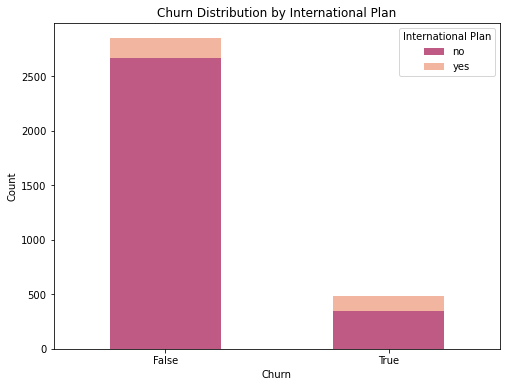

In [17]:
# Display as a bar chart

# Plots a stacked bar chart to visualize the relationship
churn_intl_plan.plot(kind='bar', stacked=True, figsize=(8, 6), color=custom_colors)

plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution by International Plan')
plt.xticks(rotation=0)
plt.legend(title='International Plan')

plt.show()

Observations:

- Among customers who did not churn (churn=False), approximately 93.50% have "no" international plan, and 6.50% have "yes" international plan.
- Among customers who churned (churn=True), approximately 71.64% have "no" international plan, and 28.36% have "yes" international plan.

In [18]:
# Count the number of churned and non-churned customers by voicemail plan
churn_voicemail = df.groupby(['churn', 'voice mail plan']).size().unstack()
total_churn_vm= churn_voicemail.sum(axis=1)  # Calculate the total count for each churn category
percentage_vm = churn_voicemail.div(total_churn_vm, axis=0) * 100  # Calculate the percentage
percentage_vm

voice mail plan,no,yes
churn,,
False,70.456140,29.543860
True,83.436853,16.563147


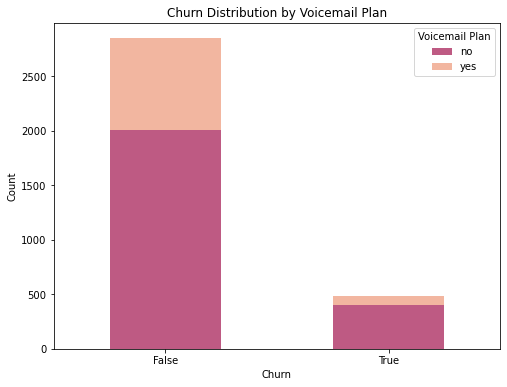

In [19]:
# Display as a bar chart

# Plot a stacked bar chart to visualize the relationship
churn_voicemail.plot(kind='bar', stacked=True, figsize=(8, 6), color=custom_colors)

plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution by Voicemail Plan')
plt.xticks(rotation=0)
plt.legend(title='Voicemail Plan')

plt.show()

Observations:

- Churned customers (True): 83.44% did not have a voice mail plan (no), while 16.56% had a voice mail plan (yes).

- Non-churned customers (False): 70.46% did not have a voice mail plan (no), and 29.54% had a voice mail plan (yes).

In [20]:
churn_area_code = df.groupby('area code')['churn'].value_counts().unstack()
churn_area_code

churn,False,True
area code,,
408,716,122
415,1419,236
510,715,125


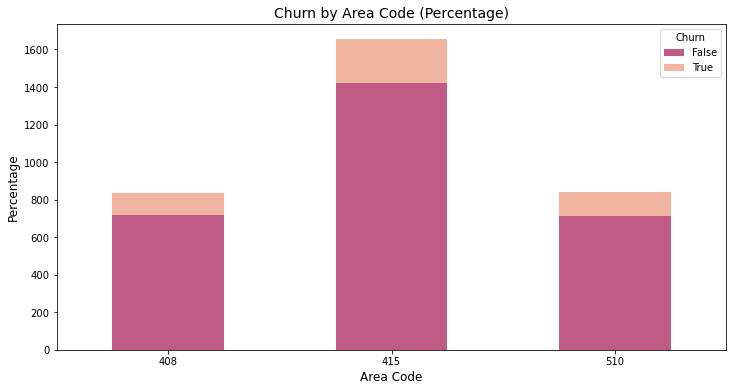

In [21]:
churn_area_code.plot(kind='bar', stacked=True, figsize=(12, 6), color=custom_colors)
plt.xlabel('Area Code', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Churn by Area Code (Percentage)', fontsize=14)
plt.legend(title='Churn', loc='upper right')
plt.xticks(rotation=0)
plt.show()

Observations:


1. In area code <u>408</u>, there are 716 customers who did not churn, while 122 customers churned. The churn rate for this area code is relatively lower compared to the non-churn rate.

2. Area code <u>415</u> has a higher number of non-churned customers, with 1419 customers, compared to 236 customers who churned. 

3. In area code <u>510</u>, there are 715 non-churned customers, while 125 customers churned. 